<h1>Data Analysis and Visualization Home Assignment</h1>
<li>I've tried to outline the steps for you so please make use of the cells
<li>If you run into data size issues, subset your data. But try to use as much as you can get away with
<li>Note that many of the steps will take a while to run, especially if your computer is not powerful enough. Be patient! 


<ol>
<li>Read the data from <a href="https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2016-01.csv">https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2016-01.csv</a>
<li>Remove any data that is outside the NYC bounding box
<ul>
<li>NYC bounding box: westlimit=-74.2635; southlimit=40.4856; eastlimit=-73.7526; northlimit=40.9596
<li>See http://boundingbox.klokantech.com for info on bounding boxes
</ul>
<li>Calculate taxi trip duration and save in a new column "duration"
<li>Convert duration into a float
<li>Do some basic analysis (see below)
<li>Add a day of week column
<li>Add an hour of day column
<li>Do some analysis (see below)
<li>Divide the data into zones
<ul>
<li>write a function createZoneTable(zone_factor) that divides the bounding box into zones
<li>the idea is to create zone_factor * zone_factor zones
<li>e.g., if zone_factor is 20, you'll create 20*20 = 400 zones
<li>Divide the longitude (-73.7526 to -74.2635) into zone_factor (e.g., 20) sections
<li>Divide the latitude (40.4856 to 40.9596) into zone_factor (e.g., 20) sections
<li>Return a table (a list of lists) containing a zone id, and the coordinates of the zone
<li>(see e.g., below)
</ul>
<li>Write a function get_zone(lat,lon) that figures out the zone given a latitude and longitude
<li>Apply this function to the dataframe, first with pickup lats and longs; then with dropoff lats and longs
<li>This will give two new "pickup_zone" and "dropoff_zone" columns
<li>Do some analysis (see below)
<li>Using folium, draw a heatmap of the number of trips originating in each zone
<ul>
<li>Create a geojson object for all the zones 
<li>Create a df that contains zone numbers and the number of trips originating in each zone
<li>Use folium to create a heatmap
<li><b>OPTIONAL:</b> You'll notice that the bounding box is much larger than New York City. Try to remove every zone that has 0 originating trips from your map. (Hint: You can remove them from the geojson object)


<h2>Read the data</h2>


In [202]:
#Add necessary imports and functions to read the data
import datetime #function that does the date time formating 
import pandas as pd
datafile = "/Users/alyshahudson/Documents/dataAnalytics/yellow_tripdata_2016-01.csv"


In [203]:
df = pd.read_csv(datafile) #read in the file

In [204]:
df.head(10) #prints the top part just to check it

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2016-01-01 00:00:00,2016-01-01 00:00:00,2,1.10,-73.990372,40.734695,1,N,-73.981842,40.732407,2,7.5,0.5,0.5,0.0,0.0,0.3,8.8
1,2,2016-01-01 00:00:00,2016-01-01 00:00:00,5,4.90,-73.980782,40.729912,1,N,-73.944473,40.716679,1,18.0,0.5,0.5,0.0,0.0,0.3,19.3
2,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,10.54,-73.984550,40.679565,1,N,-73.950272,40.788925,1,33.0,0.5,0.5,0.0,0.0,0.3,34.3
3,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,4.75,-73.993469,40.718990,1,N,-73.962242,40.657333,2,16.5,0.0,0.5,0.0,0.0,0.3,17.3
4,2,2016-01-01 00:00:00,2016-01-01 00:00:00,3,1.76,-73.960625,40.781330,1,N,-73.977264,40.758514,2,8.0,0.0,0.5,0.0,0.0,0.3,8.8
5,2,2016-01-01 00:00:00,2016-01-01 00:18:30,2,5.52,-73.980118,40.743050,1,N,-73.913490,40.763142,2,19.0,0.5,0.5,0.0,0.0,0.3,20.3
6,2,2016-01-01 00:00:00,2016-01-01 00:26:45,2,7.45,-73.994057,40.719990,1,N,-73.966362,40.789871,2,26.0,0.5,0.5,0.0,0.0,0.3,27.3
7,1,2016-01-01 00:00:01,2016-01-01 00:11:55,1,1.20,-73.979424,40.744614,1,N,-73.992035,40.753944,2,9.0,0.5,0.5,0.0,0.0,0.3,10.3
8,1,2016-01-01 00:00:02,2016-01-01 00:11:14,1,6.00,-73.947151,40.791046,1,N,-73.920769,40.865578,2,18.0,0.5,0.5,0.0,0.0,0.3,19.3
9,2,2016-01-01 00:00:02,2016-01-01 00:11:08,1,3.21,-73.998344,40.723896,1,N,-73.995850,40.688400,2,11.5,0.5,0.5,0.0,0.0,0.3,12.8


<h2>Remove data outside the bounding box</h2>


In [205]:

westlimit=-74.2635; southlimit=40.4856; eastlimit=-73.7526; northlimit=40.9596
#Remove the data that is not within the limits specified above
df = df[(df['pickup_longitude'] >= -74.2635) & (df['pickup_longitude'] <= -73.7526)]
df = df[(df['dropoff_longitude'] >= -74.2635) & (df['dropoff_longitude'] <= -73.7526)]
df = df[(df['pickup_latitude'] >= 40.4856) & (df['pickup_latitude'] <= 40.9596)]
df = df[(df['dropoff_latitude'] >= 40.4856) & (df['dropoff_latitude'] <= 40.9596)]

In [206]:
df = df.iloc[:1000000]
df
#segments the data to speed up processing
#can comment this out to run for all but it takes a while

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2016-01-01 00:00:00,2016-01-01 00:00:00,2,1.10,-73.990372,40.734695,1,N,-73.981842,40.732407,2,7.5,0.5,0.5,0.00,0.00,0.3,8.80
1,2,2016-01-01 00:00:00,2016-01-01 00:00:00,5,4.90,-73.980782,40.729912,1,N,-73.944473,40.716679,1,18.0,0.5,0.5,0.00,0.00,0.3,19.30
2,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,10.54,-73.984550,40.679565,1,N,-73.950272,40.788925,1,33.0,0.5,0.5,0.00,0.00,0.3,34.30
3,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,4.75,-73.993469,40.718990,1,N,-73.962242,40.657333,2,16.5,0.0,0.5,0.00,0.00,0.3,17.30
4,2,2016-01-01 00:00:00,2016-01-01 00:00:00,3,1.76,-73.960625,40.781330,1,N,-73.977264,40.758514,2,8.0,0.0,0.5,0.00,0.00,0.3,8.80
5,2,2016-01-01 00:00:00,2016-01-01 00:18:30,2,5.52,-73.980118,40.743050,1,N,-73.913490,40.763142,2,19.0,0.5,0.5,0.00,0.00,0.3,20.30
6,2,2016-01-01 00:00:00,2016-01-01 00:26:45,2,7.45,-73.994057,40.719990,1,N,-73.966362,40.789871,2,26.0,0.5,0.5,0.00,0.00,0.3,27.30
7,1,2016-01-01 00:00:01,2016-01-01 00:11:55,1,1.20,-73.979424,40.744614,1,N,-73.992035,40.753944,2,9.0,0.5,0.5,0.00,0.00,0.3,10.30
8,1,2016-01-01 00:00:02,2016-01-01 00:11:14,1,6.00,-73.947151,40.791046,1,N,-73.920769,40.865578,2,18.0,0.5,0.5,0.00,0.00,0.3,19.30
9,2,2016-01-01 00:00:02,2016-01-01 00:11:08,1,3.21,-73.998344,40.723896,1,N,-73.995850,40.688400,2,11.5,0.5,0.5,0.00,0.00,0.3,12.80


<h2>Add a column for taxi trip duration</h2>
<li>strptime formats: http://pubs.opengroup.org/onlinepubs/009695399/functions/strptime.html

In [228]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

#s_time = df['tpep_pickup_datetime'].apply(lambda x:datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
#e_time = df['tpep_dropoff_datetime'].apply(lambda x:datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))

In [208]:
df['duration'] = df['tpep_dropoff_datetime']-df['tpep_pickup_datetime'] #calculates trip time

#type(df['tpep_dropoff_datetime'][0]) checks to make sure it is a timestamp object

pandas._libs.tslibs.timestamps.Timestamp

<h2>Convert duration column into a float (number of seconds)</h2>
<li><span style="color:blue">timedelta64(1, 's')</span> represents one second

In [209]:
df['duration'] = df['duration'].apply(lambda x:x.total_seconds())
df2 = df.head(10)
df2
#checks the application of lambda function to convert to total seconds

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
0,2,2016-01-01 00:00:00,2016-01-01 00:00:00,2,1.10,-73.990372,40.734695,1,N,-73.981842,40.732407,2,7.5,0.5,0.5,0.0,0.0,0.3,8.8,0.0
1,2,2016-01-01 00:00:00,2016-01-01 00:00:00,5,4.90,-73.980782,40.729912,1,N,-73.944473,40.716679,1,18.0,0.5,0.5,0.0,0.0,0.3,19.3,0.0
2,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,10.54,-73.984550,40.679565,1,N,-73.950272,40.788925,1,33.0,0.5,0.5,0.0,0.0,0.3,34.3,0.0
3,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,4.75,-73.993469,40.718990,1,N,-73.962242,40.657333,2,16.5,0.0,0.5,0.0,0.0,0.3,17.3,0.0
4,2,2016-01-01 00:00:00,2016-01-01 00:00:00,3,1.76,-73.960625,40.781330,1,N,-73.977264,40.758514,2,8.0,0.0,0.5,0.0,0.0,0.3,8.8,0.0
5,2,2016-01-01 00:00:00,2016-01-01 00:18:30,2,5.52,-73.980118,40.743050,1,N,-73.913490,40.763142,2,19.0,0.5,0.5,0.0,0.0,0.3,20.3,1110.0
6,2,2016-01-01 00:00:00,2016-01-01 00:26:45,2,7.45,-73.994057,40.719990,1,N,-73.966362,40.789871,2,26.0,0.5,0.5,0.0,0.0,0.3,27.3,1605.0
7,1,2016-01-01 00:00:01,2016-01-01 00:11:55,1,1.20,-73.979424,40.744614,1,N,-73.992035,40.753944,2,9.0,0.5,0.5,0.0,0.0,0.3,10.3,714.0
8,1,2016-01-01 00:00:02,2016-01-01 00:11:14,1,6.00,-73.947151,40.791046,1,N,-73.920769,40.865578,2,18.0,0.5,0.5,0.0,0.0,0.3,19.3,672.0
9,2,2016-01-01 00:00:02,2016-01-01 00:11:08,1,3.21,-73.998344,40.723896,1,N,-73.995850,40.688400,2,11.5,0.5,0.5,0.0,0.0,0.3,12.8,666.0


<h2>Remove data where duration is greater than 10000 seconds</h2>

In [210]:
df = df[(df['duration'] < 10000.0)]
#also trimmed distance, outliers were not related to the time it should have taken
df = df[(df['trip_distance'] < 100.0)]
#also removes data for greater than 100 miles

<h2>Plot duration and compare with a gamma distribution</h2>

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "





0it [00:00, ?it/s]

0it [00:00, ?it/s]

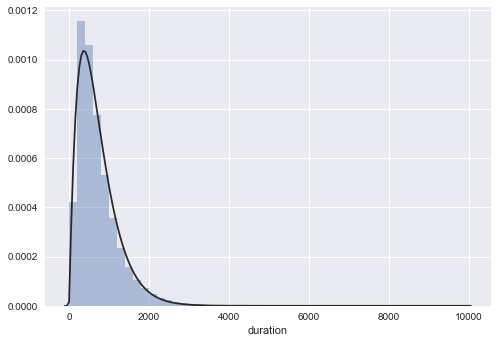

In [211]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from tqdm import tqdm
plt.style.use('seaborn')


sns.distplot(df['duration'],kde=False,fit=stats.gamma)
#fits the duration plot with a gamma distribution as a means of comparison

<h2>Plot the scatter plot between trip_distance and duration</h2>

Text(0,0.5,'Trip Distance in miles')

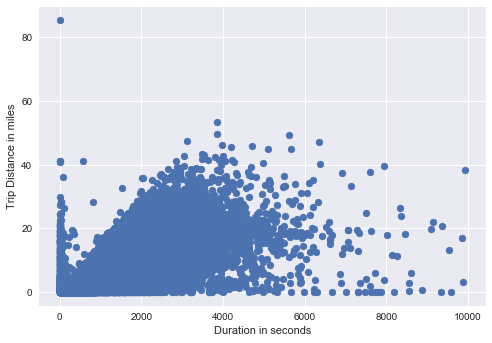

In [245]:
plt.scatter(df['duration'],df['trip_distance'])
plt.xlabel('Duration in seconds')
plt.ylabel('Trip Distance in miles')

<h2>Create a column "day_of_week" that puts in an integer for the weekday</h2>
<li>Monday = 1, Sunday = 7
<li>Investigate here! https://docs.python.org/3/library/datetime.html
<li>Use tpep_pickup_datetime to get the weekday

In [213]:
df['day_of_week'] = df['tpep_pickup_datetime'].apply(lambda x: (x.date().weekday()+1))
df['day_of_week']

0          5
1          5
2          5
3          5
4          5
5          5
6          5
7          5
8          5
9          5
10         5
11         5
12         5
13         5
14         5
15         5
16         5
17         5
18         5
19         5
20         5
21         5
22         5
23         5
24         5
25         5
26         5
27         5
28         5
29         5
          ..
1019865    1
1019866    1
1019867    1
1019869    1
1019870    1
1019871    1
1019872    1
1019873    1
1019874    1
1019875    1
1019876    1
1019877    1
1019878    1
1019879    1
1019880    1
1019881    1
1019883    1
1019884    1
1019885    1
1019886    1
1019887    1
1019888    1
1019889    1
1019890    1
1019891    1
1019892    1
1019893    1
1019894    1
1019895    1
1019896    1
Name: day_of_week, Length: 997930, dtype: int64

<h2>Create time of day buckets using the hour part of tpep_pickup_datetime</h2>

In [214]:
df['pickup_hour'] = df['tpep_pickup_datetime'].apply(lambda x: (x.time().hour))

<h2>Plot a bar graph that groups the data by day of week and then by time of day</h2>
<li>Do you notice any differences?</li>

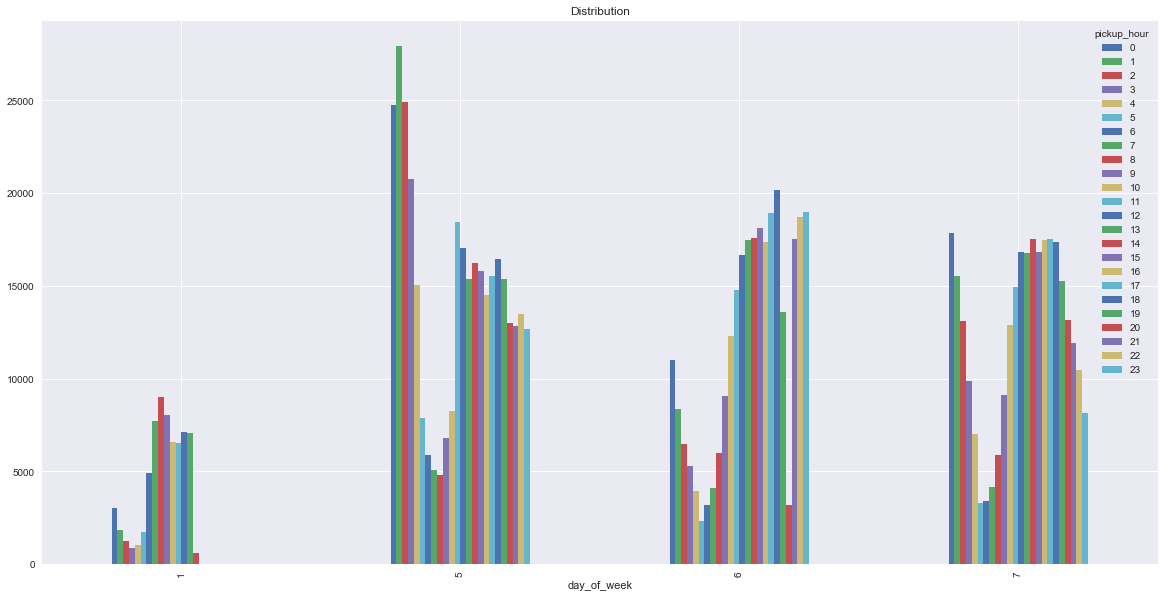

In [246]:
#change pickup hour here!!
week_grouping = df.groupby(['day_of_week','pickup_hour'])
week_grouping.size().unstack().plot(kind="bar", title= "Distribution", figsize=(20,10))
#looks weird because I chopped the data set down by a lot, if you run it as the full
#data set will be fixed

<h2>Create zones</h2>

In [337]:
import numpy as np
#needs to be a list of tuples
#each tuple contains zone id and list of coordinates
#longitude by latitute 
#prof said example is wrong!!!

def createZoneTable(zone_factor,westlimit=-74.2635, southlimit=40.4856, eastlimit=-73.7526, northlimit=40.9596):
    zone_table = list()
    x_longitude = np.arange(zone_factor+1)*abs((eastlimit-westlimit))/zone_factor
    x_latitude = np.arange(zone_factor+1)*abs((northlimit-southlimit))/zone_factor
    longitude_total = westlimit + x_longitude
    latitude_total = southlimit + x_latitude
    counter = 0
    for y in range(0,zone_factor):
        for x in range(0, zone_factor):
            lb = [longitude_total[y], latitude_total[x]]
            rb = [longitude_total[y], latitude_total[x+1]]
            lt = [longitude_total[y+1], latitude_total[x]]
            rt = [longitude_total[y+1], latitude_total[x+1]]
            zone_table.append((str(counter),[lb,rb,lt,rt,lb]))
            counter += 1
        
    #longitude east west latitutde north south
    

    return zone_table
createZoneTable(2)

[('0',
  [[-74.2635, 40.4856],
   [-74.2635, 40.7226],
   [-74.00805, 40.4856],
   [-74.00805, 40.7226],
   [-74.2635, 40.4856]]),
 ('1',
  [[-74.2635, 40.7226],
   [-74.2635, 40.9596],
   [-74.00805, 40.7226],
   [-74.00805, 40.9596],
   [-74.2635, 40.7226]]),
 ('2',
  [[-74.00805, 40.4856],
   [-74.00805, 40.7226],
   [-73.7526, 40.4856],
   [-73.7526, 40.7226],
   [-74.00805, 40.4856]]),
 ('3',
  [[-74.00805, 40.7226],
   [-74.00805, 40.9596],
   [-73.7526, 40.7226],
   [-73.7526, 40.9596],
   [-74.00805, 40.7226]])]

Example of a zone table

[('00',
  [[40.4856, -74.2635],
   [40.4856, -74.21240999999999],
   [40.533, -74.21240999999999],
   [40.533, -74.2635],
   [40.4856, -74.2635]]),
 ('01',
  [[40.4856, -74.21240999999999],
   [40.4856, -74.16131999999999],
   [40.533, -74.16131999999999],
   [40.533, -74.21240999999999],
   [40.4856, -74.21240999999999]]),
 ('02',
  [[40.4856, -74.16131999999999],
   [40.4856, -74.11022999999999],
   [40.533, -74.11022999999999],
   [40.533, -74.16131999999999],
   [40.4856, -74.16131999999999]]),
 ('03',
  [[40.4856, -74.11022999999999],
   [40.4856, -74.05913999999999],
   [40.533, -74.05913999999999],
   [40.533, -74.11022999999999],
   [40.4856, -74.11022999999999]]),

In [338]:
def createGeoJsonObject(zone_table):
    zone_data_dict = dict()
    zone_data_dict['type'] = 'FeatureCollection'
    zone_data_dict_features = list()
    for z in zone_table:
        data_point = { "type": "Feature",
        "geometry": {"type": "Polygon", "coordinates": [z[1]]},
        "properties": {"Zone_id": z[0]}
        }
        zone_data_dict_features.append(data_point)
    zone_data_dict['features'] = zone_data_dict_features
    
    
    #Your code goes here
    
    return zone_data_dict
createGeoJsonObject(createZoneTable(2))

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-74.2635, 40.4856],
      [-74.2635, 40.7226],
      [-74.00805, 40.4856],
      [-74.00805, 40.7226],
      [-74.2635, 40.4856]]]},
   'properties': {'Zone_id': '0'}},
  {'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-74.2635, 40.7226],
      [-74.2635, 40.9596],
      [-74.00805, 40.7226],
      [-74.00805, 40.9596],
      [-74.2635, 40.7226]]]},
   'properties': {'Zone_id': '1'}},
  {'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-74.00805, 40.4856],
      [-74.00805, 40.7226],
      [-73.7526, 40.4856],
      [-73.7526, 40.7226],
      [-74.00805, 40.4856]]]},
   'properties': {'Zone_id': '2'}},
  {'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-74.00805, 40.7226],
      [-74.00805, 40.9596],
      [-73.7526, 40.7226],
      [-73.7526, 40.9596],
      [-74.00805, 40.7226]]]},


Example of the 'features' list in the geojson object

{'features': [{'geometry': {'coordinates': [[[-74.2635, 40.4856],
      [-74.21240999999999, 40.4856],
      [-74.21240999999999, 40.533],
      [-74.2635, 40.533],
      [-74.2635, 40.4856]]],
    'type': 'Polygon'},
   'properties': {'zone_id': '00'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [[[-74.21240999999999, 40.4856],
      [-74.16131999999999, 40.4856],
      [-74.16131999999999, 40.533],
      [-74.21240999999999, 40.533],
      [-74.21240999999999, 40.4856]]],
    'type': 'Polygon'},
   'properties': {'zone_id': '01'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [[[-74.16131999999999, 40.4856],
      [-74.11022999999999, 40.4856],
      [-74.11022999999999, 40.533],
      [-74.16131999999999, 40.533],
      [-74.16131999999999, 40.4856]]],
    'type': 'Polygon'},
   'properties': {'zone_id': '02'},
   'type': 'Feature'},

<h3>Create the zone table for zone_factor = 20</h3>

In [339]:
zone_table = createZoneTable(20,westlimit=-74.2635, southlimit=40.4856, eastlimit=-73.7526, northlimit=40.9596)
aly = zone_table

<h2>Write a function that returns a zone number given a latitude and a longitude</h2>

<li>The function should return a string zone number
<li>For the example, <span style="color:blue">get_zone(40.65,-74.19)</span> the function should return "31"

In [340]:
def get_zone(lat,lon,zone_table):
    result = ''
    for zone in zone_table:
        name = zone[0]
        coord = zone[1]
        long_low = coord[0][0]
        long_high = coord[1][0]
        lat_low = coord[0][1]
        lat_high = coord[2][1]
        if ((lat <= lat_high) and (lat >= lat_low) and (lon >= long_low) and (lon <= long_high)):
            return name
        else: 
            continue
get_zone(40.65,-74.19, aly)  


<h2>Create  pickup_zone and dropoff_zone columns for the dataframe</h2>
<li>This is a little tricky
<li>Pandas 'apply' function applies a function to each row in turn


<h4>apply</h4>

df.apply(foo)<br>
translates to<br>
foo(row1)<br>
foo(row2)<br>
foo(row3)<br>
i.e., the table row is the implicit argument of foo.
<p>
If we want to write our own foo, the argument to foo will be a dataframe row.<p>
From this row, we can extract the values we want and pass it to the explicit arguments of foo
<p>


In [341]:
import pandas as pd
df_sample = pd.DataFrame([[1,5,7],[2,4,6],[3,9,2]],columns=['A','B','C'])

print(df_sample)
def foo(x,y):
    return x+y

df_sample['new_col'] = df_sample.apply(lambda x: foo(x['A'],x['B']),axis=1)
#axis = 1 means extract data from rows of the dataframe. by default, it extracts from columns. (Set axis to 0 and see what happens)

df_sample

   A  B  C
0  1  5  7
1  2  4  6
2  3  9  2


,A,B,C,new_col
0,1,5,7,6
1,2,4,6,6
2,3,9,2,12


In [342]:
df['pickup_zone'] = df.apply(lambda x: get_zone(x['pickup_latitude'], x['pickup_longitude'],aly), axis=1)
df['dropoff_zone'] = df.apply(lambda x: get_zone(x['dropoff_latitude'], x['dropoff_longitude'],aly), axis=1)









<h2>Calculate the following</h2>
<li>Percentage of the total rides where the pickup zone is the same as the dropoff zone
<li>Zone with the highest pickups
<li>Zone with the highest dropoffs

In [343]:
pickdrop = np.where(df['pickup_zone']==df['dropoff_zone'], 1,0)
print("Percentage of the total rides where pickup zone is dropoff zone", round(pickdrop.mean()*100),"%")
hp_zone = df.groupby('pickup_zone').pickup_zone.count().sort_values(ascending=False).index[0]
print("Zone with highest pick up:", hp_zone)
hd_zone = df.groupby('dropoff_zone').dropoff_zone.count().sort_values(ascending=False).index[0]
print("Zone with highest drop off:", hd_zone)

Percentage of the total rides where pickup zone is dropoff zone 0.0 %


IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
df.head()

<h2>Groupby analysis</h2>
<li>Group data by the hour of the day and by the pickup zone
<li>Draw a figure of 24 plots that show the top 5 pickup zones at each hour


In [ ]:
import matplotlib.pyplot as plt
hour_df = df.groupby(["pickup_zone","pickup_hour"])
hour_grouping = hour_df.size().unstack().fillna(0)

c,r= 3,8
graph,axes = plt.subplots(r,c,figsize=(15,20))

for i, (pickup_zone, daycount) in enumerate(hour_grouping.items()): 
    ax = axes[int(i/c), i%c]
    daycount = daycount.sort_values(ascending=False)[:5]  
    daycount = daycount.plot(kind='barh', ax=ax)
    ax.set_title(pickup_zone)

plt.show() 


<h2>Groupby analysis 2</h2>
<li>Group data by the weekday and the pickup zone
<li>Draw a figure of 7 plots that show the top 5 pickup zones on each day

In [ ]:
import matplotlib.pyplot as plt
weekday_df = df.groupby(["pickup_zone","day_of_week"])
weekday_grouping = weekday_df.size().unstack().fillna(0)

c,r= 2,4
graph,axes = plt.subplots(r,c,figsize=(15,20))

for i, (pickup_zone, daycount) in enumerate(weekday_grouping.items()): 
    ax = axes[int(i/c), i%c]
    daycount = daycount.sort_values(ascending=False)[:5]  
    daycount = daycount.plot(kind='barh', ax=ax)
    ax.set_title(pickup_zone)

plt.show() 

<h1>Most frequent morning pickups</h1>
<li>Identify the most frequent pickup zone between 8 am and 9 am on a weekday



In [ ]:
df2 = df[(df["day_of_week"] <6) & (df["pickup_hour"] >=8) & (df["pickup_hour"] <=9)].groupby('pickup_zone')
pick_up_df= df2.pickup_zone.count().sort_values(ascending=False).index[0]
print("frequent pick-ups:",pick_up_df)


<h2>Mapping</h2>
<li>Draw a folium map using the polygon geojson object and the counts dataframe (see class example)

In [ ]:
import folium
zone_groups = pd.DataFrame(df.groupby('pickup_zone').size())
zone_groups.rename(columns={0:'pickups'},inplace=True)
zone_groups.reset_index(inplace=True)

geo_json_object = createGeoJsonObject(aly)
m=folium.Map(location=[40.7589,-73.9851],zoom_start=12)

m.choropleth(geo_data=geo_json_object, data=zone_groups,
            columns=['pickup_zone','pickups'],
            key_on ='feature.properties.Zone_id',
            fill_color='RdYlGn', fill_opacity=0.7, line_opacity=0.8,
            legend_name='Distribution of Trips')
folium.LayerControl().add_to(m)

In [ ]:
m